data downloaded from kaggle:https://www.kaggle.com/residentmario/ramen-ratings/downloads/ramen-ratings.zip/1

NJabbari; 08012019

H0 = Review stars for ramen in Japan is the same as review stars for ramen in USA.

H1= Review stars for ramen in Japan is significantly higher than the review stars for ramen in USA.

alpha= 0.05

In [110]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df=pd.read_csv('ramen-ratings.zip')

In [101]:
df['Country'].value_counts()[:2]  #get the top two countries with most ramen reviews

Japan    352
USA      323
Name: Country, dtype: int64

In [118]:
sample_japan = df.loc[df['Country']=='Japan']['Stars']

In [119]:
sample_usa = df.loc[df['Country']=='USA']['Stars']

In [120]:
sample_japan=[float(i) for i in sample_japan]

In [121]:
sample_usa=[float(i) for i in sample_usa]

In [122]:
sample = sample_japan+sample_usa

In [142]:
SIZE = 10_000
bootstrap_samples_japan = []
bootstrap_sample_japan_means = np.zeros(SIZE)

for i in range(SIZE):
    bootstrap_sample_japan = np.random.choice(sample_japan, size=352)
    bootstrap_samples_japan.append(bootstrap_sample_japan)
    bootstrap_sample_japan_means[i] = bootstrap_sample_japan.mean()

In [143]:
bootstrap_samples_usa = []
bootstrap_sample_usa_means = np.zeros(SIZE)

for i in range(SIZE):
    bootstrap_sample_usa = np.random.choice(sample_usa, size=323)
    bootstrap_samples_usa.append(bootstrap_sample_usa)
    bootstrap_sample_usa_means[i] = bootstrap_sample_usa.mean()

In [125]:
print(np.std(bootstrap_sample_japan_means))
print(np.std(bootstrap_sample_usa_means))
print(bootstrap_sample_japan_means.mean())
print(bootstrap_sample_usa_means.mean())

0.04863976843471782
0.05816026335676154
3.9812636576704543
3.4568679179566564


In [146]:
print(np.percentile(a=bootstrap_sample_japan_means, q=2.5))
print(np.percentile(a=bootstrap_sample_japan_means, q=97.5))

3.8835919744318184
4.075071022727273


In [147]:
print(np.percentile(a=bootstrap_sample_usa_means, q=2.5))
print(np.percentile(a=bootstrap_sample_usa_means, q=97.5))

3.3393962848297214
3.571981424148607


In [126]:
mu = bootstrap_sample_usa_means.mean()
sigma = bootstrap_sample_usa_means.std()
usadistribution = stats.norm(loc = mu , scale = sigma)
japanese_mu_est = bootstrap_sample_japan_means.mean()

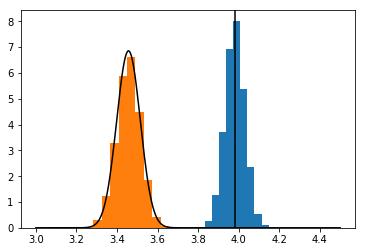

In [127]:
xx = np.linspace(3,4.5,256)
fig, ax= plt.subplots()
ax.hist(bootstrap_sample_japan_means,density = True) 
ax.hist(bootstrap_sample_usa_means,density = True);
ax.plot(xx,usadistribution.pdf(xx), color = 'k')
ax.axvline(bootstrap_sample_japan_means.mean(), color = 'k')

In [115]:
deltamean = abs(usadistribution.mean() - japanese_mu_est)
pvalue = usadistribution.sf(mu+deltamean)+usadistribution.cdf(mu-deltamean)
pvalue   # p<0.05 , therefore H0 is rejected

2.797056097246444e-19

In [116]:
pvalue = sum(bootstrap_sample_japan_means < bootstrap_sample_usa_means.mean())/SIZE
pvalue # p<0.05 , therefore H0 is rejected

0.0